# **Mission of regression notebook**

You are a member of a bioinformatics team investigating the [effect of spaceflight on astronaut health](https://en.wikipedia.org/wiki/Effect_of_spaceflight_on_the_human_body).  Your team is trying to find the [biological pathways](https://en.wikipedia.org/wiki/Biological_pathway) that respond to exposure of adverse conditions in space such as [microgravity](https://www.nasa.gov/centers-and-facilities/glenn/what-is-microgravity/) and [radiation](https://www.nasa.gov/directorates/esdmd/hhp/space-radiation/).  You just performed clustering on the RNA-seq data and have determined there is a noticeable separation between spaceflight and ground control samples gene expression profiles, giving you confidence that there is a signal that machine learning could exploit.  You have also received the results of several phenotype experiments including tonometry and immunostaining microscopy, so you can now perform supervised learning algorithms with your data.

Your mission is to use supervised machine learning - [regression](https://en.wikipedia.org/wiki/Regression_analysis) - to determine if the RNA-seq data from astronaut samples and their ground control counterparts have clearly distinguishable gene expression profiles.  For if they do, then there is a chance that a supervised learning method can predict responses to spaceflight using different combinations and weights of gene expression from the RNA-seq data.

In this notebook, you will use linear regression to predict the value of a phenotype response given its associated RNA-seq gene expression profile.

# Read in methods

**IMPORTANT**: Make sure you put a copy of the methods.ipynb in your google drive by following [these instructions](https://docs.google.com/document/d/1V9a3Z5YKT2Pbef4fgPAwB83bHX-p-rPBRRwo7w5Bi9k/edit?usp=sharing).

All the methods are stored in another notebook which you've already copied onto your Google drive.  You'll find it under "MyDrive/Colab Notebooks" and it's called "Copy of methods.ipynb".  We will now mount your Google drive and import the methods from that notebook.



In [76]:
# install the import_ipynb module which allows us to import notebooks into notebooks
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.4 MB/s eta 0:00:00


In [77]:
# mount your Google drive to the "mnt/" mount point
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt")

Mounted at mnt


In [78]:
# import the "Copy of methods.ipynb" notebook into this notebook
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

# read in data and metadata

In this section, we will define the data and metadata python dictionaries that will be used to store the OSDR experiment data.  

In [79]:
# define data and metadata dictionaries
data=dict()
metadata=dict()

In [80]:
# read in the metadata for each OSDR data set
metadata['583'] = m.read_meta_data('583')
metadata['255'] = m.read_meta_data('255')
metadata['568'] = m.read_meta_data('568')

In [81]:
# read in the transformed results CSV file for intra-ocular pressure
data['iop'] = m.read_phenotype_data('583', 'LSDS-16_tonometry_maoTRANSFORMED')
print('iop data shape: ', data['iop'].shape)
data['iop'].head()

iop data shape:  (100, 13)


,Source Name,Sample Name,Factor Value: Spaceflight,Left_1,Left_2,Left_3,Avg_Left,Right_1,Right_2,Right_3,Avg_Right,time_Start,Time_End
0,F1,F1_Mouse_Eye,Space Flight,19,16,18,17.666667,18,18,15,17.000000,2:46,2:48
1,F2,F2_Mouse_Eye,Space Flight,17,16,16,16.333333,16,16,15,15.666667,2:55,2:58
2,F3,F3_Mouse_Eye,Space Flight,16,18,15,16.333333,17,19,17,17.666667,2:32,2:34
3,F4,F4_Mouse_Eye,Space Flight,18,15,16,16.333333,18,16,15,16.333333,2:15,2:17
4,F5,F5_Mouse_Eye,Space Flight,18,18,16,17.333333,14,16,14,14.666667,2:20,2:22


In [82]:
# use pandas to read in the normalized counts
data['255-normalized'] = m.read_rnaseq_data('255_rna_seq_Normalized_Counts')
print('rna-seq data shape: ', data['255-normalized'].shape)
data['255-normalized'].head()

rna-seq data shape:  (23419, 17)


,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,ENSMUSG00000000001,265.491507,272.529585,264.891134,245.804042,205.478969,244.866957,250.587443,232.249604,241.739792,240.866309,278.344274,266.781019,238.447580,239.632932,242.777557,257.121918
1,ENSMUSG00000000028,22.737528,36.058646,30.659868,33.307123,11.896920,27.231801,21.727401,30.940275,34.840848,36.468997,29.993641,28.377921,19.433721,18.704883,26.226110,47.521611
2,ENSMUSG00000000031,5.574720,1.925595,2.899933,21.047427,0.000000,3.063051,7.105655,6.710188,3.266199,6.700680,1.852027,1.308210,2.248341,5.816845,2.041330,1.478741
3,ENSMUSG00000000037,14.601777,17.493816,16.577920,32.447456,12.940934,13.678983,9.358027,15.476949,25.085866,13.506677,24.809501,13.731740,21.564524,17.626982,28.873796,13.556234
4,ENSMUSG00000000049,3.107115,2.176549,0.642689,4.486992,0.895108,3.846941,2.640744,0.000000,0.000000,1.243833,0.000000,0.000000,1.676701,1.345919,0.769123,0.684388


In [83]:
#LSDS-5_immunostaining_microscopy_PECAMtr TRANSFORMED.csv
data['immunoMICRO-PECAM'] = m.read_phenotype_data('568', 'LSDS-5_immunostaining_microscopy_PECAMtr_TRANSFORMED')
print('pecam data shape: ', data['immunoMICRO-PECAM'].shape)
data['immunoMICRO-PECAM'].head()

pecam data shape:  (11, 2)


,Sample_Name,Average
0,F15_Mouse_Eye,45.0098
1,F16_Mouse_Eye,53.9888
2,F17_Mouse_Eye,37.0548
3,F18_Mouse_Eye,67.0988
4,F19_Mouse_Eye,49.7456


# Use linear regression to predict phenotype response to RNA-seq

In this section, we will use linear regression to predict IOP and immunostaining microscopy (PECAM) observations.  Not all the samples with RNA-seq data also have IOP or PECAM data, so we will need to intersect those sample lists in order to rectify this discrepancy.

## use linear regression to predict IOP from gene expression data

In [84]:
# subset df with samples from 255
samples=list()
for sample in data['255-normalized'].columns[1:]:
  samples.append(metadata['255'][metadata['255']['Sample Name']==sample]['Source Name'].values[0])
samples_short=list()
for sample in samples:
  num = ""
  for c in sample:
    if c.isdigit():
      num += str(c)
  if 'G' in sample:
    samples_short.append("GC" + num)
  elif 'F' in sample:
    samples_short.append("F" + num)
iop_df=data['iop'][data['iop']['Source Name'].isin(samples_short)]
iop_df.head()

,Source Name,Sample Name,Factor Value: Spaceflight,Left_1,Left_2,Left_3,Avg_Left,Right_1,Right_2,Right_3,Avg_Right,time_Start,Time_End
8,F9,F9_Mouse_Eye,Space Flight,14,13,12,13.000000,14,12,12,13.000000,2:11,2:13
10,F11,F11_Mouse_Eye,Space Flight,15,16,18,16.333333,16,14,15,15.000000,2:23,2:27
14,F15,F15_Mouse_Eye,Space Flight,20,19,19,19.333333,17,17,16,16.666667,2:48,2:51
15,F16,F16_Mouse_Eye,Space Flight,19,20,18,19.000000,21,18,17,18.666667,3:07,3:09
16,F17,F17_Mouse_Eye,Space Flight,18,19,18,18.333333,16,17,15,16.000000,3:03,3:05


In [85]:
samples_short

['GC9',
 'GC11',
 'GC15',
 'GC16',
 'GC17',
 'GC18',
 'GC19',
 'GC20',
 'F9',
 'F11',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20']

In [86]:
# create numpy array Y of iop values
y = list()
for i in range(len(iop_df)):
  iop_val=(iop_df.iloc[i]['Avg_Left'] + iop_df.iloc[i]['Avg_Right'])/2
  y.append(iop_val)
y = m.np.array(y)
print(y)

[13.         15.66666666 18.         18.83333333 17.16666667 18.
 19.         18.5        18.5        21.16666667 19.5        17.5
 21.66666667 17.83333333 20.66666667 16.16666667]


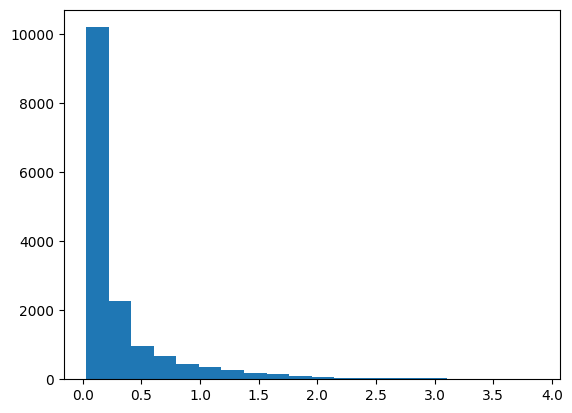

In [87]:
# subset data (drop any NaNs, drop non-coding genes, and drop genes with a coefficeint of variation less than 0.5)
df = m.filter_data(data['255-normalized'], dropnans=True, dropgenes='non-coding', droplowcvs=0.5)

In [88]:
# create numpy array X of rna-seq values
X = list()
for sample in df.columns[1:]:
  X.append(list(df[sample]))
X = m.np.array(X)

In [89]:
# split up data between training and testing
X_train, X_test, y_train, y_test = m.train_test_split(X, y, test_size=0.3, random_state=0)
# show the dimensions of the training and testing data
print('X train: ', X_train.shape)
print('y train: ', len(y_train))
print('X test: ', X_test.shape)
print('y test: ', len(y_test))

X train:  (11, 2934)
y train:  11
X test:  (5, 2934)
y test:  5


In [90]:
# now run linear regression on X, y
reg = m.LinearRegression().fit(X_train, y_train)
print('score: ', reg.score(X_train, y_train))
print('coefs: ', reg.coef_)
print('intercept: ', reg.intercept_)

score:  1.0
coefs:  [ 2.93788831e-03 -7.60385502e-04 -2.42878575e-04 ... -2.65179801e-06
 -1.80563389e-05  2.54543204e-04]
intercept:  12.159039336498083


In [91]:
# get y_pred and and compare against the actual values of y
y_pred = reg.predict(X_test)
pred = m.pd.DataFrame({'True_value': y_test, 'Predicted': y_pred})
pred

,True_value,Predicted
0,15.666667,9.307458
1,19.000000,17.075309
2,18.500000,22.032793
3,21.166667,24.245869
4,17.833333,13.998622


In [92]:
# get performance of regression
# r2 score
r2=m.r2_score(y_test, y_pred, multioutput='variance_weighted')
print('r2 score: ', r2)

# mean absolute error
mae = m.mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

# mean squared error
mse = m.mean_squared_error(y_test, y_pred)
print('mse: ', mse)

r2 score:  -4.11103159343485
mae:  3.746121118742997
mse:  16.162217709249028


An r2 score of -4.1 is a decent score, despite having so few training samples.  The mean absolute error is pretty small. It's very likely that our model is overfit.  Later in this notebook, we will use regularization later to try to correct for this.

In [93]:
# find the top 10 genes with the highest coefficients in the linear regression model.  These are the most important features that were used to predict the IOP values
reg = m.LinearRegression().fit(X, y)
genes_coefs_dict = dict()
genes_list = list(df['Unnamed: 0'])
coefs_list = list(reg.coef_)
for i in range(len(genes_list)):
  genes_coefs_dict[genes_list[i]] = coefs_list[i]

genes_coefs_sorted_dict = {k: v for k, v in sorted(genes_coefs_dict.items(), key=lambda item: item[1], reverse=True)}

top10_genes = list(m.islice(genes_coefs_sorted_dict, 10))
print(top10_genes)

['ENSMUSG00000006154', 'ENSMUSG00000000049', 'ENSMUSG00000025498', 'ENSMUSG00000021804', 'ENSMUSG00000031502', 'ENSMUSG00000102543', 'ENSMUSG00000032060', 'ENSMUSG00000117310', 'ENSMUSG00000047793', 'ENSMUSG00000018339']


In [94]:
# convert gene ID's to gene symbols so we can look them up in a database
top10_gene_symbols = m.get_symbol_from_id(top10_genes)
print(top10_gene_symbols)

['Eps8l1', 'Apoh', 'Irf7', 'Rgr', 'Col4a1', 'Pcdhgc5', 'Cryab', 'Ptp4a1', 'Sned1', 'Gpx3']


 We can  paste the list of these genes into a tool called [MSigDB](https://www.gsea-msigdb.org/gsea/msigdb/index.jsp)  - the molecular signatures database - to see which biological pathways and molecular functions are affected by this particular subset of  genes.  For this particular set of genes, here is a subset of the [gene ontologies](https://en.wikipedia.org/wiki/Gene_Ontology) that MSigDB found as significantly associated

| Description | FDR q-value |
| --- | --- |     
| Abnormal lens morphology| 4.1e-03 |
| A collagen trimer that forms networks. | 4.1E-03 |
| Myopia| 4.44E-03|
| Lenticonus| 4.44E-03 |
| Developmental cataract | 8.65E-03 |
| Abnormal anterior eye segment morphology | 8.65E-03 |

**QUESTIONS**

1. Assuming the `top10_gene_symbols` list variable is sorted in descending order of importance, which gene symbol is the most important gene in the prediction of IOP?

2. Which gene name (ENSMUSG...) corresponds to the most important gene from question #1?

3. Do the descriptions of the biological processes that MSigDB identified from this list of genes seem to correlate well to the observed phenotype?

**Double click here to enter your answers to the questions above.**

1.

2.

3.

## use linear regression to predict immunostaining microscopy (pecam) from gene expression

The immunostaining microscopy data use different sample names and source names from the RNA-seq data, even though they are the same mice.  So the first thing we need to do is figure out which are the ground control sample names and which are the spaceflight sample names.  Only some of the samples have measurements for both RNA-seq and for microscopy, so we need to find the intersection of those 2 sets.


In [95]:
# get source names from 255 and sample names in immunoMICRO pecam and intersect the lists and subset the df's
# TODO turn this into a method
samples_255_dict = dict()
samples_pecam = list()
for i in range(len(metadata['255'])):
  sample = metadata['255'].iloc[i]['Source Name']
  sample_id = ""
  for c in sample:
    if c.isdigit():
      sample_id += c
  if "G" in sample:
    samples_255_dict["GC" + str(sample_id)] = metadata['255'].iloc[i]['Sample Name']

  elif "F" in sample:
    samples_255_dict["F" + str(sample_id)] = metadata['255'].iloc[i]['Sample Name']
  else:
    continue

for sample in data['immunoMICRO-PECAM']['Sample_Name']:
  if sample.startswith("G"):
    sample_id=sample.split("_")[0]
    samples_pecam.append(str(sample_id))

  elif sample.startswith("F"):
    sample_id=sample.split("_")[0]
    samples_pecam.append(str(sample_id))
  else:
    continue

print('rna-seq samples: ', samples_255_dict.keys())
print('pecam samples: ', samples_pecam)
# intersect 255 samples with immunoMICRO pecam samples
samples_both=list(set(samples_255_dict.keys()) & set(samples_pecam))
print('both: ', samples_both)
# subset 255 and pecam samples from intersection
gsm_samples = list()
for sample in samples_both:
  gsm_samples.append(samples_255_dict[sample])
print('gsm: ', gsm_samples)

rna-seq samples:  dict_keys(['GC9', 'GC11', 'GC15', 'GC16', 'GC17', 'GC18', 'GC19', 'GC20', 'F9', 'F11', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20'])
pecam samples:  ['F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'GC15', 'GC16', 'GC17', 'GC18', 'GC19']
both:  ['F20', 'F19', 'F15', 'GC18', 'F18', 'F16', 'GC16', 'GC17', 'GC19', 'GC15', 'F17']
gsm:  ['GSM3932708', 'GSM3932707', 'GSM3932703', 'GSM3932698', 'GSM3932706', 'GSM3932704', 'GSM3932696', 'GSM3932697', 'GSM3932699', 'GSM3932695', 'GSM3932705']


In [137]:
# now subset the RNA-seq data (255) with with the gsm sample names in gsm_samples
df_255_568 = data['255-normalized'][['Unnamed: 0'] + gsm_samples]
print(df_255_568.columns)

Index(['Unnamed: 0', 'GSM3932708', 'GSM3932707', 'GSM3932703', 'GSM3932698',
       'GSM3932706', 'GSM3932704', 'GSM3932696', 'GSM3932697', 'GSM3932699',
       'GSM3932695', 'GSM3932705'],
      dtype='object')


In [138]:
# create numpy array X of rna-seq values.  This will represent our independent variables X.
X = list()
for sample in df_255_568.columns[1:]:
  X.append(list(df_255_568[sample]))
X = m.np.array(X)
print('X = ', X)

X =  [[257.12191793  47.52161099   1.47874073 ...   0.89284721   0.
    0.89191803]
 [242.77755695  26.22611008   2.04132984 ...   3.00967956   2.99753628
    0.        ]
 [278.34427412  29.99364147   1.85202697 ...   0.           1.11859216
    0.        ]
 ...
 [250.58744311  21.7274007    7.10565504 ...   0.           0.
    0.        ]
 [264.89113411  30.65986791   2.89993255 ...   0.           0.
    1.6767273 ]
 [238.44758045  19.43372072   2.24834081 ...   0.           1.25969794
    0.        ]]


In [139]:
# create numpy array y of immuno PECAM values.  This will represent our dependent variables y.
y = list()
for i in range(len(data['immunoMICRO-PECAM'])):
  pecam_val=data['immunoMICRO-PECAM'].iloc[i]['Average']
  y.append(pecam_val)
y = m.np.array(y)
print('y = ', y)

y =  [45.0098 53.9888 37.0548 67.0988 49.7456 43.2828 37.771  38.1888 25.5472
 38.0384 36.8556]


In [140]:
# split up data between training and testing
X_train, X_test, y_train, y_test = m.train_test_split(X, y, test_size=0.3, random_state=0)
# show the dimensions of the training and testing data
print('X train: ', X_train.shape)
print('y train: ', len(y_train))
print('X test: ', X_test.shape)
print('y test: ', len(y_test))

X train:  (7, 23419)
y train:  7
X test:  (4, 23419)
y test:  4


In [141]:
# Now that we have X and y, use linear regression to predict immuno pecam (y) from the gene expression X.
reg = m.LinearRegression().fit(X_train, y_train)
print('score: ', reg.score(X_train, y_train))
print('coefs: ', reg.coef_)
print('intercept: ', reg.intercept_)

score:  1.0
coefs:  [-1.79655932e-05  2.27854486e-05 -2.67665262e-05 ...  2.02413918e-07
 -2.01685081e-08 -2.50274489e-08]
intercept:  250.46547487353016


In [142]:
# Use the model "reg" that we just built to predict the y values from the X values.
# then compare the true values y to the predict values y_pred
y_pred = reg.predict(X_test)
pred = m.pd.DataFrame({'True_value': y_test, 'Predicted': y_pred})
pred

,True_value,Predicted
0,49.7456,22.326166
1,38.0384,31.861941
2,37.0548,46.422457
3,36.8556,68.004881


In [143]:
# get performance of regression

# r2 score
r2=m.r2_score(y_test, y_pred, multioutput='variance_weighted')
print('r2 score: ', r2)

# mean absolute error
mae = m.mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

# mean squared error
mse = m.mean_squared_error(y_test, y_pred)
print('mse: ', mse)

r2 score:  -14.839818264618925
mae:  18.528207515451278
mse:  462.00116921128836


An r2 score of -14.8 and MAE of 18.5 is pretty bad, given the scale of our data.  Our model is very underfit.

In [103]:
# find important features by building model using all the data available
reg = m.LinearRegression().fit(X, y)
genes_coefs_dict = dict()
genes_list = list(df_255_568['Unnamed: 0'])
coefs_list = list(reg.coef_)
for i in range(len(genes_list)):
  genes_coefs_dict[genes_list[i]] = coefs_list[i]

genes_coefs_sorted_dict = {k: v for k, v in sorted(genes_coefs_dict.items(), key=lambda item: item[1], reverse=True)}

top10_genes = list(m.islice(genes_coefs_sorted_dict, 10))
print(top10_genes)


['ENSMUSG00000064357', 'ENSMUSG00000119584', 'ENSMUSG00000118866', 'ENSMUSG00000065947', 'ENSMUSG00000101111', 'ENSMUSG00002076161', 'ENSMUSG00000027273', 'ENSMUSG00000064363', 'ENSMUSG00000063524', 'ENSMUSG00000064370']


In [104]:
# print the gene symbol (name) associated with each gene id in the top 10 most important genes from our linear regression model
gene_symbols = m.get_symbol_from_id(top10_genes)
print(gene_symbols)

['mt-Atp6', 'Rn18s-rs5', 'Rn7s1', 'mt-Nd4l', 'Gm28437', 'Rn7sk', 'Snap25', 'mt-Nd4', 'Eno1', 'mt-Cytb']


We can  paste the list of these genes into a tool called [MSigDB](https://www.gsea-msigdb.org/gsea/msigdb/index.jsp)  - the molecular signatures database - to see which biological pathways and molecular functions are affected by this particular subset of  genes.  For this particular set of genes , here is a subset of the [gene ontologies](https://en.wikipedia.org/wiki/Gene_Ontology) that MSigDB found as significantly associated.  Note that your top 10 list may be different than the one specified in this paragraph.  

| Description | FDR q-value |
| --- | --- |
| Abnormal full-field electroretinogram| 1.53E-05 |
| Abnormal posterior eye segment morphology | 2.22E-05 |
| Abnormality of retinal pigmentation | 2.46E-05 |
| The sequence of reactions within a cell required to convert absorbed photons from visible light into a molecular signal| 2.8E-05 |
| Visual impairment | 9.58E-05 |


**QUESTIONS**

1. How many samples were used to build this linear regression model?

2.  What data type are the inputs X and y to the regression model -- numpy arrays or pandas dataframes?

3. Based on the biological pathways that MSigDB found as enriched by the top most important genes in the regression model, do the our results suggest there is a relationship between the gene expression and the phenotypes observed?

**Double click here to enter your answers to the questions above.**

1.

2.

3.

# Use ridge regression for L2 regularization

[Ridge regression](https://www.youtube.com/watch?v=Xm2C_gTAl8c&ab_channel=StatQuestwithJoshStarmer) is a form of regression that adds a lambda multiple of the square of the slope of the regression line to the sum of the squares of the residuals as an extra term to minimize (optimize) the objective function.  The lambda term is a configurable hyperparameter that ranges from 0 (no regularization penalty) to an arbitrarily large number (maximum regularization penalty).  The larger the value of lambda, the smaller the value of the slope the model will find to minimize the total sum.

Where ridge regression uses the square of the slope or L2-norm, [lasso regression](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer) uses the absolute value of the slope or L1-norm.

In [127]:
# create numpy array X of rna-seq values.  This will represent our independent variables X.
X = list()
for sample in df_255_568.columns[1:]:
  X.append(list(df_255_568[sample]))
X = m.np.array(X)
print('X = ', X)

X =  [[257.12191793  47.52161099   1.47874073 ...   0.89284721   0.
    0.89191803]
 [242.77755695  26.22611008   2.04132984 ...   3.00967956   2.99753628
    0.        ]
 [278.34427412  29.99364147   1.85202697 ...   0.           1.11859216
    0.        ]
 ...
 [250.58744311  21.7274007    7.10565504 ...   0.           0.
    0.        ]
 [264.89113411  30.65986791   2.89993255 ...   0.           0.
    1.6767273 ]
 [238.44758045  19.43372072   2.24834081 ...   0.           1.25969794
    0.        ]]


In [128]:
# create numpy array y of immuno PECAM values.  This will represent our dependent variables y.
y = list()
for i in range(len(data['immunoMICRO-PECAM'])):
  pecam_val=data['immunoMICRO-PECAM'].iloc[i]['Average']
  y.append(pecam_val)
y = m.np.array(y)
print('y = ', y)

y =  [45.0098 53.9888 37.0548 67.0988 49.7456 43.2828 37.771  38.1888 25.5472
 38.0384 36.8556]


In [132]:
# use ridge regression to predict the PECAM values from the gene expressiond data and use 10000 as a (very large) regularization parameter
reg = m.Ridge(alpha=1.0)
reg.fit(X_train, y_train)


Ridge()

In [133]:
# get y_pred and compare against the actual values y
y_pred = reg.predict(X_test)
pred = m.pd.DataFrame({'True_value': y_test, 'Predicted': y_pred})
pred

,True_value,Predicted
0,10.197597,10.301455
1,9.952558,10.347147
2,10.463839,10.141058
3,8.939452,10.152607


While the predicted values are not exactly the actual values, they are very close, even though we used a large regularization parameter.  What is likely happening here is that because we have so many genes, it's easy for the model to find a linear combination of those values to predict the y values.  One solution to this problem is to reduce the number of genes we use in the model which we will not do in this exercise.

In [136]:
# get performance of regression

# r2 score
r2=m.r2_score(y_test, y_pred)
print('r2 score: ', r2)

# mean absolute error
mae = m.mean_absolute_error(y_test, y_pred)
print('mae: ', mae)

# mean squared error
mse = m.mean_squared_error(y_test, y_pred)
print('mse: ', mse)

r2 score:  -0.3087601275011058
mae:  0.5085960335578652
mse:  0.43560538316379904


Those performance metrics are not quite as good as we got without regularization, but they're still nearly perfect.

In [110]:
# find important features using model built on all genes
reg.fit(X, y)
genes_coefs_dict = dict()
genes_list = list(df_255_568['Unnamed: 0'])
coefs_list = list(reg.coef_)
for i in range(len(genes_list)):
  genes_coefs_dict[genes_list[i]] = coefs_list[i]

genes_coefs_sorted_dict = {k: v for k, v in sorted(genes_coefs_dict.items(), key=lambda item: item[1], reverse=True)}

top10_genes = list(m.islice(genes_coefs_sorted_dict, 10))
print(top10_genes)

['ENSMUSG00000119584', 'ENSMUSG00000064357', 'ENSMUSG00000118866', 'ENSMUSG00000065947', 'ENSMUSG00000101111', 'ENSMUSG00002076161', 'ENSMUSG00000027273', 'ENSMUSG00000063524', 'ENSMUSG00000057666', 'ENSMUSG00000024041']


In [111]:
# print the gene symbol (name) associated with each gene id in the top 10 most important genes from our linear regression model
gene_symbols = m.get_symbol_from_id(top10_genes)
print(gene_symbols)

['Rn18s-rs5', 'mt-Atp6', 'Rn7s1', 'mt-Nd4l', 'Gm28437', 'Rn7sk', 'Snap25', 'Eno1', 'Gapdh', 'Cryaa']


If we plug these 10 genes into the MSigDB database, we find a number of pathways that are responsible for muscle fiber atrophy, abnormal muscle fiber morphology, and myopathy, all of which are consistent with our phenotype that indicates a complex cellular response that may alter retina structure and BRB integrity following long-term spaceflight.

**QUESTIONS**

1. Did regularization penalize the regression model very much?

2.  What data type are the inputs X and y to the ridge regression model -- numpy arrays or pandas dataframes?

3. If we wanted to find a less overfit regression model, and since regularization doesn't seem to help, what other options do we have?

# BONUS: Use linear regression to detect heteroskedasticity

In this section, we will explore the shape of the distribution of gene expression based on its [means](https://en.wikipedia.org/wiki/Arithmetic_mean) and [variances](https://en.wikipedia.org/wiki/Variance).   When all the [random variables](https://en.wikipedia.org/wiki/Random_variable) of a model have the same finite variance, we say that the data are [homoskedastic](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity).  When the variance changes between random variables, we say that the data are [heteroskedastic](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity).

The linear regression algorithm, under the hood, uses the method of [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) to fit the regression line.  OLS assumes the error terms are homoskedastic, and when that assumption is violated, the error of the linear regression model may not be accurate.  What could give rise to heteroskedastic error terms is heteroskedastic data.  So we explore the data for this property.

In [112]:
# calculate log2 mean and log2 variance of each gene expression
means_list = list(data['255-normalized'].drop(columns=['Unnamed: 0']).mean(axis=1))
vars_list = list(data['255-normalized'].drop(columns=['Unnamed: 0']).var(axis=1))

log2_means = list()
log2_vars = list()

for mean in means_list:
  log2_means.append(m.np.log2(1 + mean))

for v in vars_list:
  log2_vars.append(m.np.log2(1 + v))

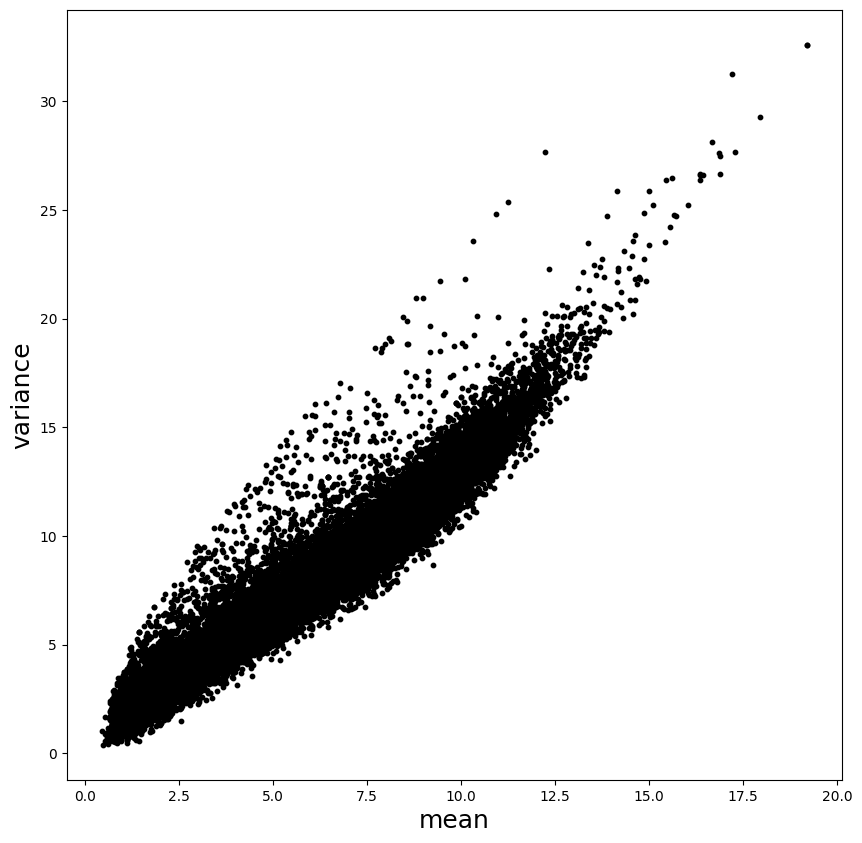

In [113]:
# plot log2 var x log2 mean
fig, ax = m.plt.subplots(figsize=(10,10))
ax.set_xlabel('mean', fontsize=18)
ax.set_ylabel('variance', fontsize=18)
m.plt.scatter(x=log2_means, y=log2_vars, marker='o', color='black', s=10)
m.plt.show()

score:  0.9302763882565543
coefs:  [1.28809543]
intercept:  0.30981357556454725


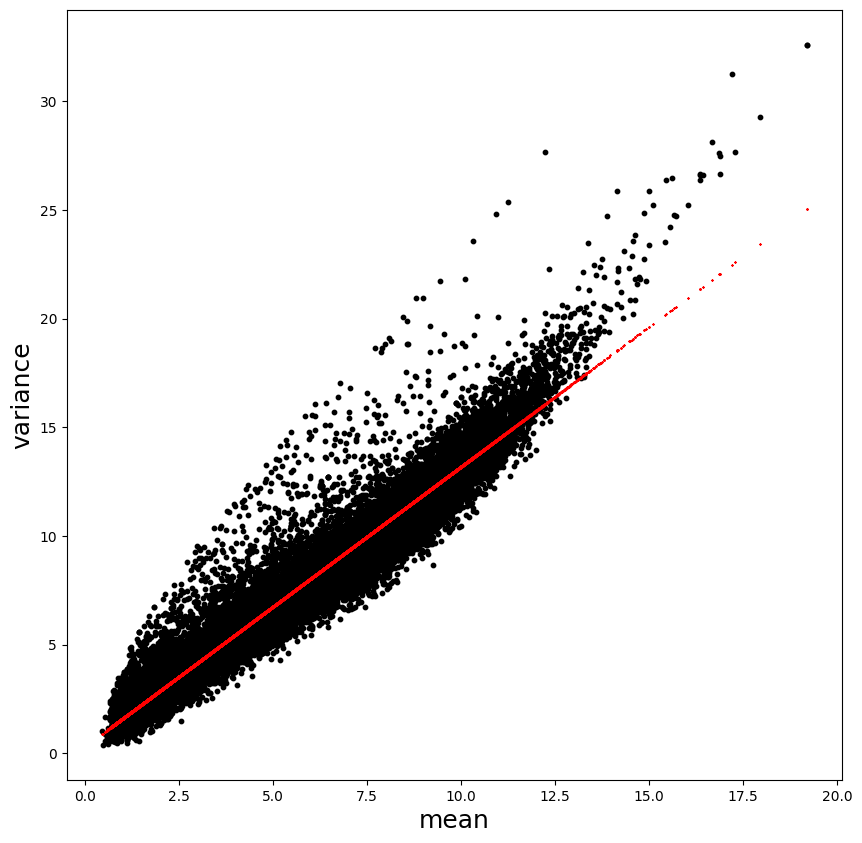

In [114]:
# fit regression line and add to plot
X = list()
for l2m in log2_means:
  X.append([l2m])

X = m.np.array(X)
y = m.np.array(log2_vars)
reg_line = m.LinearRegression().fit(X, y)
print('score: ', reg_line.score(X, y))
print('coefs: ', reg_line.coef_)
print('intercept: ', reg_line.intercept_)

y_pred=list()
for x in X:
  y_pred.append(reg_line.predict(x.reshape(1, -1))[0])

# now add regression line plot
fig, ax = m.plt.subplots(figsize=(10,10))
ax.set_xlabel('mean', fontsize=18)
ax.set_ylabel('variance', fontsize=18)
m.plt.scatter(x=log2_means, y=log2_vars, marker='o', color='black', s=10)
m.plt.scatter(x=log2_means, y=y_pred, marker='x', color='red', s=1)
m.plt.show()

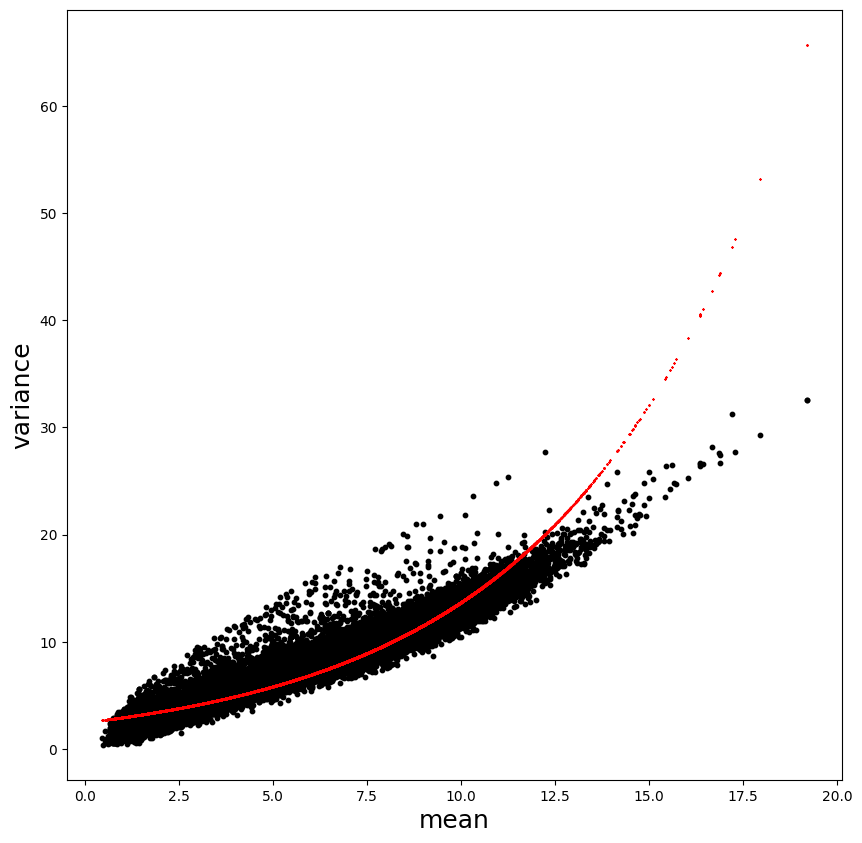

In [115]:
# use GLM to plot trend line
tweedie = m.TweedieRegressor(power=1, alpha=0.5, link='log')
tweedie.fit(X, y)
y_pred=list()
for x in X:
  y_pred.append(tweedie.predict(x.reshape(1, -1))[0])

fig, ax = m.plt.subplots(figsize=(10,10))
ax.set_xlabel('mean', fontsize=18)
ax.set_ylabel('variance', fontsize=18)
m.plt.scatter(x=log2_means, y=log2_vars, marker='o', color='black', s=10)
m.plt.scatter(x=log2_means, y=y_pred, marker='x', color='red', s=1)
m.plt.show()

**QUESTIONS**

1. Does the variance change as a function of the mean?

2. Which seems like a better fit -- a line or a curve?

3. Does linear regression only fit lines, not curves?

**Double click here to enter your answers to the questions above.**

1.

2.

3.

# BONUS: Use linear regression to predict the expression of one gene based on the expression of other genes.

In this exercise, we will pick one gene to be the target or response variable, and use the remaining genes to predict the value of that gene.  Because genes are parts of genetic networks and pathways (groups of genes that operate together), this exercise could reveal a pathway that is responsible for the difference between how ground control and spaceflight mice respond to their conditions.

The gene we will pick is the one with the highest variance across all samples.

In [116]:
# get a subset of the genes which are significantly differentially expressed between ground control and spaceflight mice
df_subset = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)
df_subset.reset_index(inplace=True)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 37.22 seconds.

Fitting dispersion trend curve...
... done in 1.64 seconds.

Fitting MAP dispersions...
... done in 39.65 seconds.

Fitting LFCs...
... done in 20.32 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.67 seconds.

Fitting MAP dispersions...
... done in 0.72 seconds.

Fitting LFCs...
... done in 0.49 seconds.

Running Wald tests...
... done in 6.37 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

In [117]:
# find gene with highest variance
vars=list(df_subset.drop(columns=['Unnamed: 0']).var(axis=1))
index_max_var = vars.index(max(vars))
max_var_gene = df_subset.iloc[index_max_var]['Unnamed: 0']
print('max variance in gene ID: ', max_var_gene)

# convert gene ID to gene symbol
target_gene=[max_var_gene]
gene_symbol = m.get_symbol_from_id(target_gene)
print('max variance in gene symbol: ', gene_symbol)

max variance in gene ID:  ENSMUSG00000041534
max variance in gene symbol:  ['Rbp3']


In [118]:
df_subset.head()

,index,Unnamed: 0,GSM3932693,GSM3932694,GSM3932695,GSM3932696,GSM3932697,GSM3932698,GSM3932699,GSM3932700,GSM3932701,GSM3932702,GSM3932703,GSM3932704,GSM3932705,GSM3932706,GSM3932707,GSM3932708
0,47,ENSMUSG00000000305,558.857179,539.086754,482.805970,608.244808,574.731125,638.563042,530.324873,610.411309,528.612649,512.442610,464.754165,435.839442,422.866728,471.512179,393.203488,534.150028
1,48,ENSMUSG00000000308,776.296367,785.300750,964.175052,845.860703,800.601738,727.416926,783.043781,742.722030,1077.691688,910.159293,938.456653,854.629697,815.006079,1038.162143,882.543743,1029.464756
2,93,ENSMUSG00000000628,6664.333120,6433.914986,7855.780695,7401.890778,6751.800952,6982.017033,6800.491713,7481.395817,6576.760915,8794.631150,9486.549439,8431.923231,7730.556692,8452.537432,9489.302273,9489.911206
3,149,ENSMUSG00000001027,133.193104,127.058087,129.229249,208.397921,125.408579,116.782893,125.047090,112.223870,192.741637,184.356069,195.679714,216.898785,184.180544,190.323912,164.638283,172.272014
4,164,ENSMUSG00000001098,417.561043,367.928550,403.446488,457.275539,393.267508,403.968612,430.060007,439.400160,398.087510,303.408252,374.194632,355.712676,311.268743,354.443771,347.414133,256.316886


You can determine the function of the `Rbp3` gene by searching that gene symbol at [NCBI](https://www.ncbi.nlm.nih.gov/gene/19661):  The `Rbp3` gene is predicted to be active in cone matrix sheath. It is expressed in eye; retina; retina nuclear layer; and retina outer nuclear layer. Human ortholog(s) of this gene are implicated in [retinitis pigmentosa](https://www.nei.nih.gov/learn-about-eye-health/eye-conditions-and-diseases/retinitis-pigmentosa).

In [119]:
# let's standardize the data
scaler = m.StandardScaler()
scaled_array = scaler.fit_transform(df_subset.drop(columns=['Unnamed: 0']))

y = scaled_array[index_max_var]
X = scaled_array[0:index_max_var].T

X_train, X_test, y_train, y_test = m.train_test_split(X, y, test_size=0.2, random_state=0)

In [120]:
# now let's build a regression model
model = m.LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [121]:
# calculate the predictions y_pred based on the X_test subset
y_pred = model.predict(X_test)
pred = m.pd.DataFrame({'True_value': y_test, 'Predicted': y_pred})
pred

,True_value,Predicted
0,10.197597,10.704653
1,9.952558,10.428471
2,10.463839,10.105275
3,8.939452,10.499102


In [122]:
# print the performance metrics of the regression model
print('Mean Absolute Error:', m.metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', m.metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', m.np.sqrt(m.metrics.mean_squared_error(y_test, y_pred)))
print('coefficient of determination:', model.score(X_test, y_test))

Mean Absolute Error: 0.7252958464055714
Mean Squared Error: 0.7611692329980191
Root Mean Squared Error: 0.8724501320981154
coefficient of determination: -1.2869045721912338


In [123]:
# calculate the predictions y_pred_train based on the X_train subset
y_pred_train = model.predict(X_train)
pred_train = m.pd.DataFrame({'True_value': y_train, 'Predicted': y_pred_train})
pred_train

,True_value,Predicted
0,8.789171,8.789171
1,9.928216,9.928216
2,10.119281,10.119281
3,9.577461,9.577461
4,9.562585,9.562585
5,10.774742,10.774742
6,9.119996,9.119996
7,9.348389,9.348389
8,10.487185,10.487185
9,0.384049,0.384049


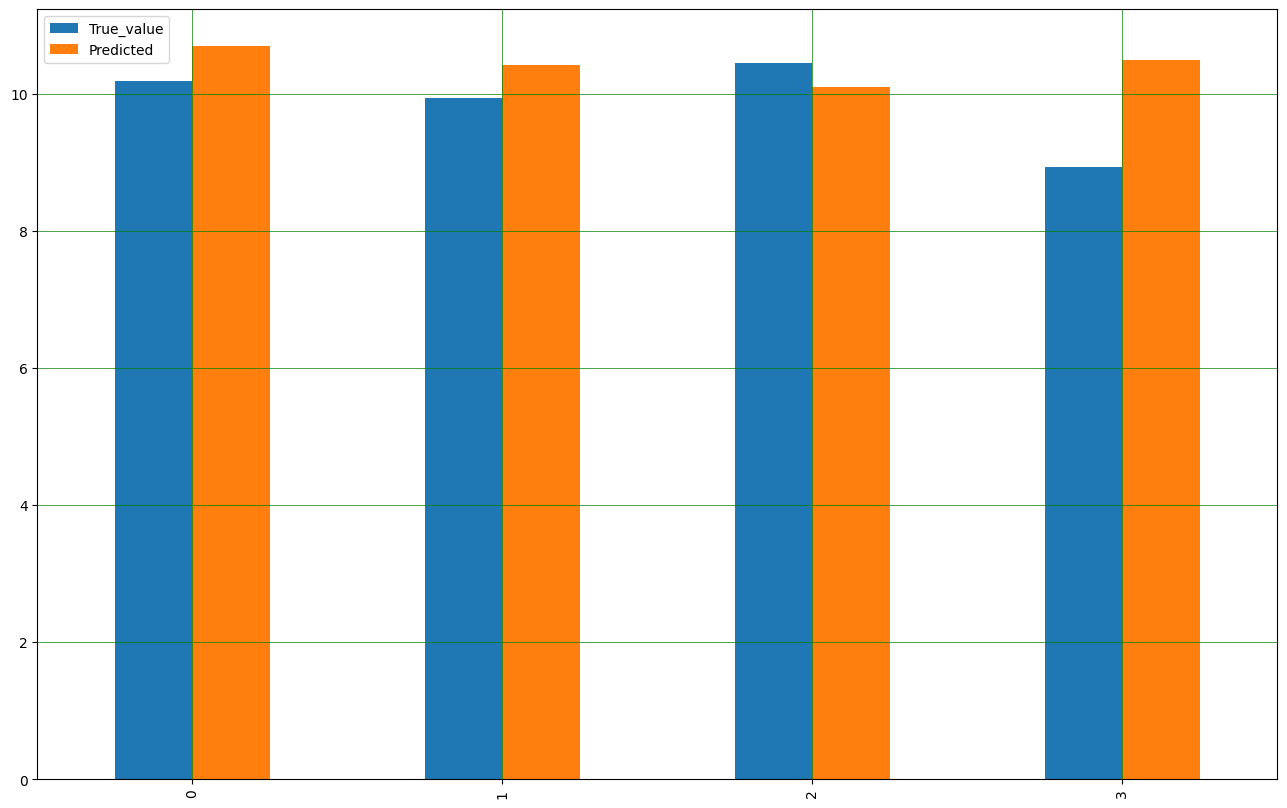

In [124]:
# we can also display the predicted vs true values graphically
pred1 = pred.head(25)
pred1.plot(kind='bar',figsize=(16,10))
m.plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
m.plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
m.plt.show()

In [125]:
# find important features (top 10 largest coefficients of the regression model)
#y_pred_train = model.predict(X_train)
model.fit(X, y)
genes_coefs_dict = dict()
genes_list = list(df_subset['Unnamed: 0'])[0:index_max_var]
coefs_list = list(model.coef_)
for i in range(len(genes_list)):
  genes_coefs_dict[genes_list[i]] = coefs_list[i]

genes_coefs_sorted_dict = {k: v for k, v in sorted(genes_coefs_dict.items(), key=lambda item: item[1], reverse=True)}

top10_genes = list(m.islice(genes_coefs_sorted_dict, 10))
print(top10_genes)

['ENSMUSG00000029580', 'ENSMUSG00000020850', 'ENSMUSG00000022237', 'ENSMUSG00000026797', 'ENSMUSG00000023979', 'ENSMUSG00000018076', 'ENSMUSG00000008348', 'ENSMUSG00000039542', 'ENSMUSG00000017344', 'ENSMUSG00000000628']


In [126]:
# print the gene symbol (name) associated with each gene id in the top 10 most important genes from our linear regression model
gene_symbols = m.get_symbol_from_id(top10_genes)
print(gene_symbols)

['Actb', 'Prpf8', 'Ankrd33b', 'Stxbp1', 'Guca1b', 'Med13l', 'Ubc', 'Ncam1', 'Vtn', 'Hk2']


When plugging these 10 genes along with the `Rbp3` gene into MSigDB, the most significantly enriched pathway is "Abnormality of the curvature of the cornea", which is again consistent with our observed phenotype.  The genes from our top 10 genes implicated in this pathway include `Guca1b`, `Prpf8`, `Stxbp`, and `Rbp3`.